<a href="https://colab.research.google.com/github/theroshanmore/theroshanmore/blob/main/1_LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Title : Loan prediction
This is a classification problem in which we need to classify whether the loan will be approved or not.

This is binary classification problem and the target variable is 'Loan_Status'

Workflow:
1. Understanding the problem statement
2. Exploratory data analysis to understand the data and check how to use to answer the maximum possible questions

In [100]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Read the data file
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [69]:
# Train and test data
xTrain = pd.read_csv('train.csv')
xTest = pd.read_csv('test.csv')

In [70]:
# Check the feature columns in the data
xTrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Categorical features:
1. Gender  (Male / Female)
2. Married (Yes / No)
3. Dependents (0,1,2,3+)
4. Education (Graduate / Not graduate)
5. Self_Employed (Yes / No)
6. Credit History (1 / 0)
7. Property_Area (Urban / Rural)
8. Loan_Status (Y / N)

Continuos features:
1. Loan ID
2. ApplicantIncome
3. CoapplicantIncome
4. LoanAmount
5. Loan_Amount_Term

# Pre-processing

In [115]:
# Combine the data for pre-processing
data = pd.concat([xTrain,xTest])
df = data

# droppping the first comlumn Loan_ID as it is not provinding any meaningful information
data.drop('Loan_ID', axis=1, inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
# checking the null values
print(data.shape)
data.info()

(981, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


There are null values in the data. how many?


In [73]:
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

There are no missing values in Education, ApplicantIncome, CoapplicantIncome and Property_Area

Loan_status is showing the maximum missing values (approx. 36%)

In [74]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Imputing the missing values
Fill null values with mode for the categorical features

In [75]:
for i in [data]:
  i['Gender'] = i['Gender'].fillna(data.Gender.dropna().mode()[0])
  i['Married'] = i['Married'].fillna(data.Married.dropna().mode()[0])
  i['Dependents'] = i['Dependents'].fillna(data.Dependents.dropna().mode()[0])
  i['Self_Employed'] = i['Self_Employed'].fillna(data.Self_Employed.dropna().mode()[0])
  i['Credit_History'] = i['Credit_History'].fillna(data.Credit_History.dropna().mode()[0])

Using iterative imputer for filling missing values of Loan Amount and Loan Amount Term







In [76]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

data1 = data.loc[:,['LoanAmount', 'Loan_Amount_Term']]
rfrImpute = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
data1 = pd.DataFrame(rfrImpute.fit_transform(data1), columns=data1.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [49]:
data.loc[:,'LoanAmount'] = data1.loc[:,'LoanAmount']
data.loc[:,'Loan_Amount_Term'] = data1.loc[:,'Loan_Amount_Term']
data.isnull().sum()
#data.isna().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [77]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,NaN
365,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


**Map the categorical variables with integers**
binary mapping hence, using direct labeling with 0 and 1

In [ ]:
#pd.set_option('max_rows', 20)
for i in [data]:
  i['Gender'] = i['Gender'].map({'Male':0,'Female':1}).astype(int)
  i['Married'] = i['Married'].map({'No':0,'Yes':1}).astype(int)
  i['Education'] = i['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
  i['Self_Employed'] = i['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
  i['Credit_History'] = i['Credit_History'].astype(int)

In [81]:
for i in [data]:
  i['Property_Area'] = i['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':3}).astype(int)
  i['Dependents'] = i['Dependents'].map({'0':0,'1':1,'2':2,'3+':3}).astype(int)

As the model does not accept string values, we have converted the string values to integers

# EDA

1. Split the processed data into newTrain and newTest

In [85]:
newTrain = data.iloc[:614]
newTest = data.iloc[614:]

In [86]:
# mapping 'N'->0 and 'Y'->1 for Loan_Status/Dependent variable
newTrain['Loan_Status'] = newTrain['Loan_Status'].map({'N':0,'Y':1}).astype(int)
newTrain

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,NaN,360.0,1,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1,1,1
610,0,1,3,1,0,4106,0.0,40.0,180.0,1,1,1
611,0,1,1,1,0,8072,240.0,253.0,360.0,1,0,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1,0,1


# Univariate analysis

In [118]:
corr =newTrain.corr()
corr.style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,-0.36,-0.17,0.05,0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.09,-0.02
Married,-0.36,1.00,0.33,-0.01,0.00,0.05,0.08,0.15,-0.10,0.01,0.00,0.09
Dependents,-0.17,0.33,1.00,-0.06,0.06,0.12,0.03,0.17,-0.10,-0.04,0.00,0.01
Education,0.05,-0.01,-0.06,1.00,0.01,0.14,0.06,0.17,0.08,0.07,0.02,0.09
Self_Employed,0.00,0.00,0.06,0.01,1.00,0.13,-0.02,0.12,-0.03,-0.00,0.02,-0.00
ApplicantIncome,-0.06,0.05,0.12,0.14,0.13,1.00,-0.12,0.57,-0.05,-0.02,-0.01,-0.00
CoapplicantIncome,-0.08,0.08,0.03,0.06,-0.02,-0.12,1.00,0.19,-0.06,0.01,-0.03,-0.06
LoanAmount,-0.11,0.15,0.17,0.17,0.12,0.57,0.19,1.00,0.04,-0.00,0.01,-0.04
Loan_Amount_Term,0.07,-0.10,-0.10,0.08,-0.03,-0.05,-0.06,0.04,1.00,0.00,0.08,-0.02
Credit_History,-0.01,0.01,-0.04,0.07,-0.00,-0.02,0.01,-0.00,0.00,1.00,0.03,0.54


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

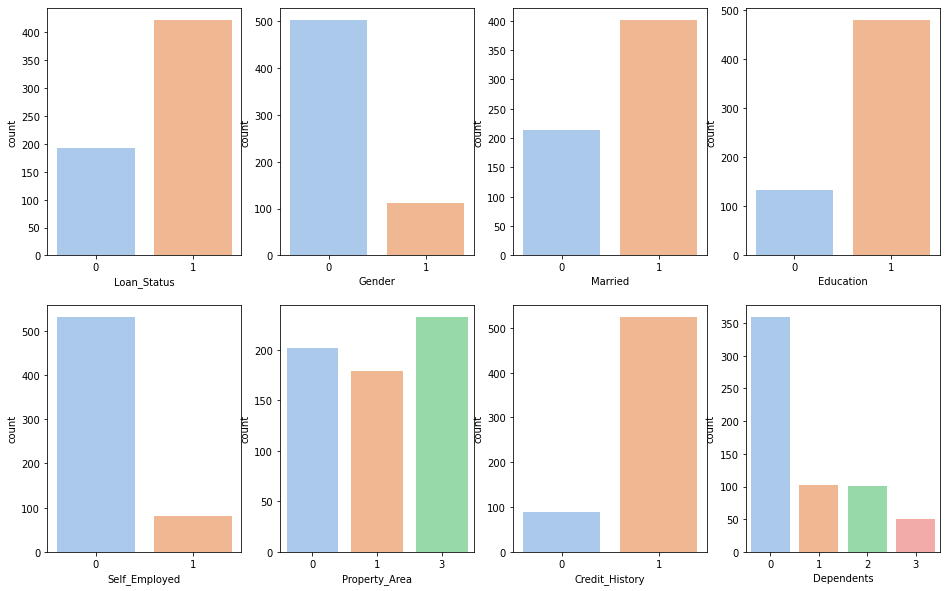

In [117]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status', data=newTrain,ax=ax[0][0], palette='pastel')
sns.countplot('Gender', data=newTrain,ax=ax[0][1], palette='pastel')
sns.countplot('Married', data=newTrain,ax=ax[0][2], palette='pastel')
sns.countplot('Education', data=newTrain,ax=ax[0][3], palette='pastel')
sns.countplot('Self_Employed', data=newTrain,ax=ax[1][0], palette='pastel')
sns.countplot('Property_Area', data=newTrain,ax=ax[1][1], palette='pastel')
sns.countplot('Credit_History', data=newTrain,ax=ax[1][2], palette='pastel')
sns.countplot('Dependents', data=newTrain,ax=ax[1][3], palette='pastel')

# Observations of univariate analysis
1. More loans are approved than rejected
2. Male applicants > Female applicants
3. Married applicants > unmarried applicants
4. graduate applicants > non-graduate
5. Non-self employed (salaried) > Self-employed
6. Properties are located as semi-urban>urban>rural
7. Credit histiry is present for maximum applicants
8. Maximum applicants are with no-dependents

# Bi-variate analysis

How each feature is related to the response?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


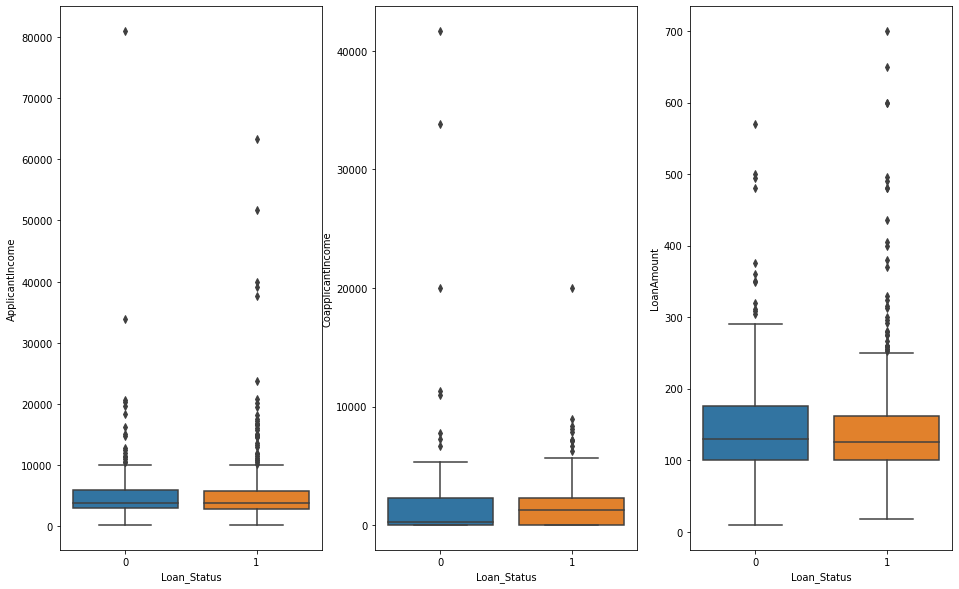

In [173]:
fig,ax = plt.subplots(1,3,figsize=(16,10))
sns.boxplot(newTrain['Loan_Status'],newTrain['ApplicantIncome'], orient="v", ax=ax[0])
sns.boxplot(newTrain['Loan_Status'],newTrain['CoapplicantIncome'], orient="v", ax=ax[1])
sns.boxplot(newTrain['Loan_Status'],newTrain['LoanAmount'], orient="v", ax=ax[2])

1. Median of applicant income with and without loan approval status is same. The IQR is also looks similar.
2. The median coapplicant income is less for non-approved loan compared to approved loan status. 
3. The median non-approved loan amount is slightly greater than approved loan 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


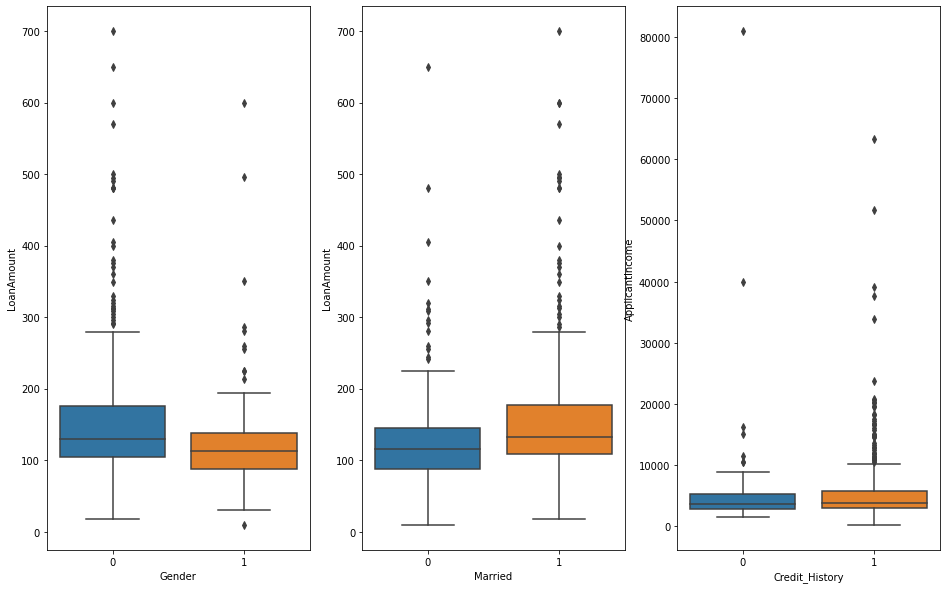

In [179]:
fig,ax = plt.subplots(1,3,figsize=(16,10))
sns.boxplot(newTrain['Gender'],newTrain['LoanAmount'], orient="v", ax=ax[0])
sns.boxplot(newTrain['Married'],newTrain['LoanAmount'], orient="v", ax=ax[1])
sns.boxplot(newTrain['Credit_History'],newTrain['ApplicantIncome'], orient="v", ax=ax[2])

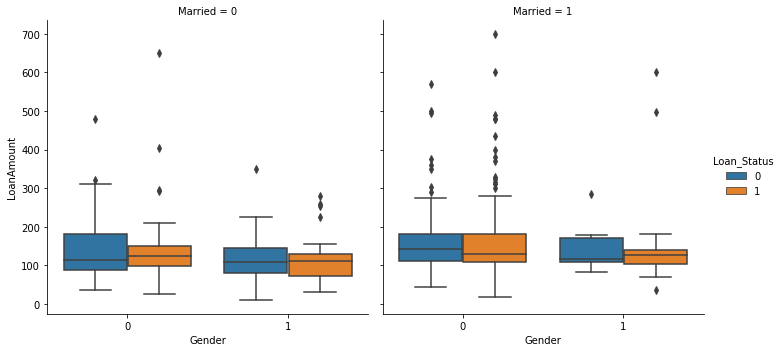

In [182]:
sns.catplot(x='Gender', y='LoanAmount', data=newTrain, kind='box', hue='Loan_Status', col='Married')

1. The applied loan amount by married m/f is higher than unmarried m/f
2. Very few outliers in female applicants than male applicants

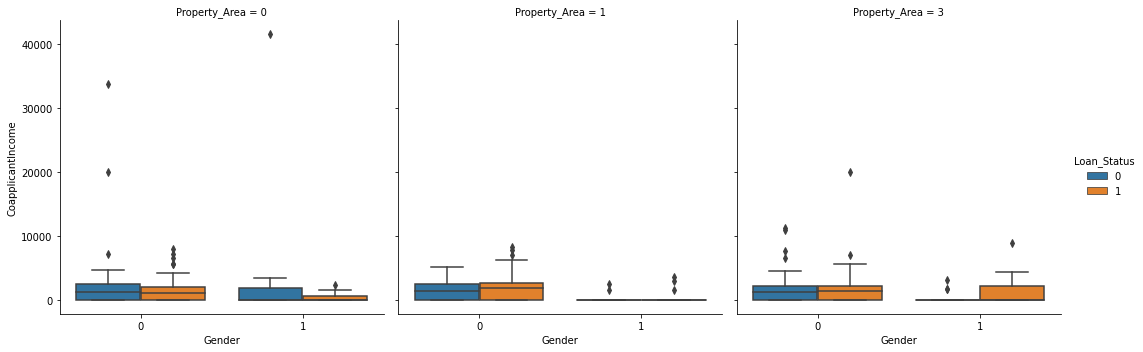

In [184]:
sns.catplot(x='Gender', y='CoapplicantIncome', data=newTrain, kind='box', hue='Loan_Status', col='Property_Area')

Males have higher co-applicant income than females

In [153]:
print(newTrain.min(axis=0))
print(newTrain.max(axis=0))

Gender                 0.0
Married                0.0
Dependents             0.0
Education              0.0
Self_Employed          0.0
ApplicantIncome      150.0
CoapplicantIncome      0.0
LoanAmount             9.0
Loan_Amount_Term      12.0
Credit_History         0.0
Property_Area          0.0
Loan_Status            0.0
dtype: float64
Gender                   1.0
Married                  1.0
Dependents               3.0
Education                1.0
Self_Employed            1.0
ApplicantIncome      81000.0
CoapplicantIncome    41667.0
LoanAmount             700.0
Loan_Amount_Term       480.0
Credit_History           1.0
Property_Area            3.0
Loan_Status              1.0
dtype: float64


Text(0.5, 0, 'ApplicantIncome')

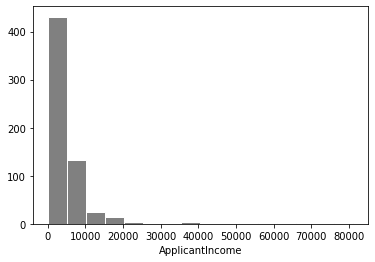

In [158]:
plt.hist(newTrain['ApplicantIncome'], bins=16, edgecolor='white', histtype='bar', color='grey')
plt.xlabel('ApplicantIncome')

# correlation matrix

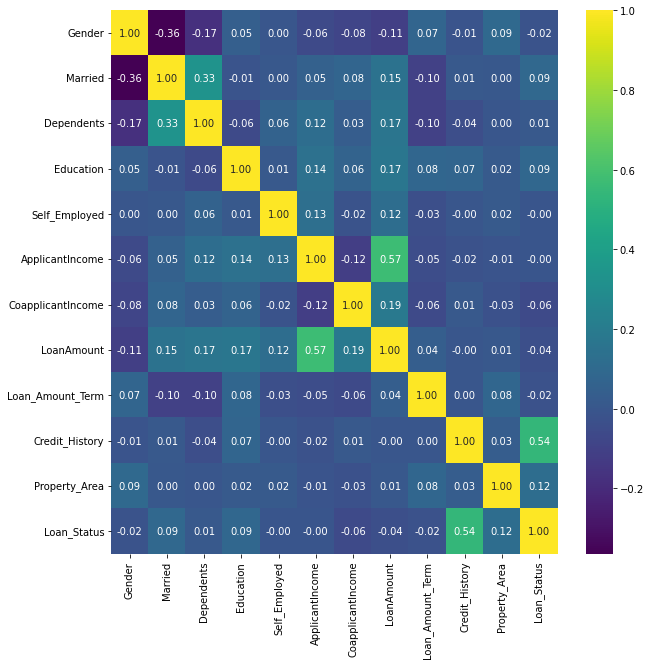

In [185]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='viridis',annot=True,fmt='.2f')

Following correlations are observed:
1. Loan_Status ~ Credit_History
2. LoanAmount ~ ApplicantIncome

# Feature Engineering